# Part 2: Pandas and Matplotlib

In [1]:
# ignore the warnings when loading matplotlib
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Question 2.1: (5 pts)

Load the CSV file `/datasets/spotify_songs.csv` into a variable `spotify_pd` using Pandas

In [2]:
# YOUR CODE HERE
spotify_pd = pd.read_csv('/datasets/spotify_songs.csv')
#raise NotImplementedError()

In [3]:
assert spotify_pd.shape == (2009, 15)
assert list(spotify_pd.columns) ==  ['song_title',
 'artist',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'time_signature',
 'valence']

## Question 2.2: (10 pts)

Add a column named `z_loudness` to `spotify_pd` that contains the standardized loudness score. i.e., for each loadness $l_i$, compute $z_i$ as follows

$$z_i = \frac{l_i - \hat{l}}{\text{std(l)}}$$

where $\hat{l}$ is the mean of loadness and $\text{std(l)}$ is the standard deviation of loadness.

Create a variable `top_z` that contains a Pandas dataframe whose $z_i$ score is more than 1.5 and only with the `song_title` and the `z_loudness` columns, sorted by `z_loudness` from highest to lowest. You can modify `spotify_pd` while you produce `top_z`

The first three rows should look like this:

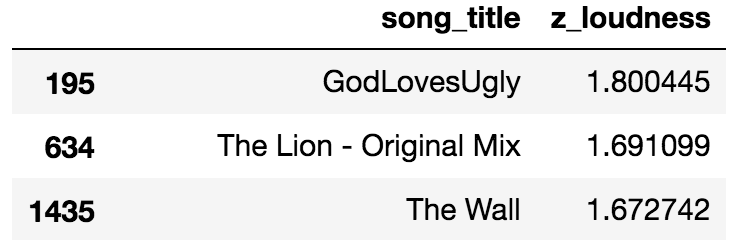

In [4]:
# YOUR CODE HERE
spotify_pd['z_loudness'] = (spotify_pd['loudness'] - (spotify_pd['loudness']).mean())/(spotify_pd['loudness']).std() 
top_z = spotify_pd.loc[spotify_pd.z_loudness>1.5, ['song_title','z_loudness']]
top_z = top_z.sort_values('z_loudness', ascending=0)
top_z.z_loudness
#raise NotImplementedError()

195     1.800445
634     1.691099
1435    1.672742
2002    1.633367
1291    1.617670
205     1.574304
627     1.566056
1459    1.547433
589     1.518434
1299    1.516571
Name: z_loudness, dtype: float64

In [5]:
assert list(top_z.columns) == ['song_title', 'z_loudness']
assert top_z.shape == (10, 2)
np.testing.assert_almost_equal(top_z.z_loudness, [1.8004451259549996,
 1.6910992100376612,
 1.6727418664894949,
 1.633366694820964,
 1.617669835844996,
 1.5743039373181682,
 1.5660564351443544,
 1.5474330431389682,
 1.5184337613020098,
 1.5165714221014712])

## Question 2.3 (5 pts)

Do a histogram plot of `duration_ms` for `spotify_pd` and put proper labels. The plot should look like this:

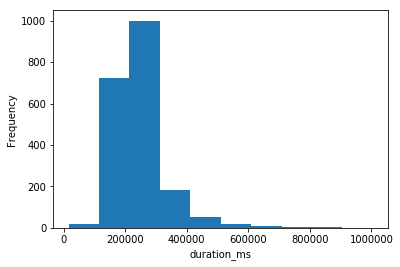

Text(0,0.5,'Frequency')

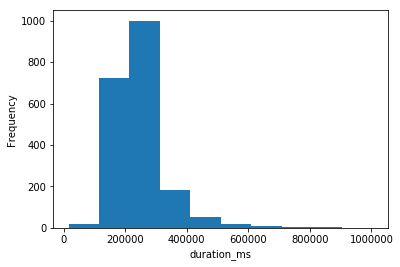

In [6]:
# YOUR CODE HERE
plt.hist(spotify_pd.duration_ms)
plt.xlabel('duration_ms')
plt.ylabel('Frequency')
#raise NotImplementedError()

# Question 2.4 (5 pts)

Do a scatter plot between `duration_ms` (x axis) and `danceability` (y axis)

Text(0,0.5,'danceability')

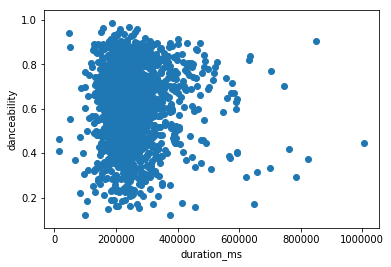

In [7]:
# YOUR CODE HERE
plt.scatter(spotify_pd.duration_ms,spotify_pd.danceability)
plt.xlabel('duration_ms')
plt.ylabel('danceability')
#raise NotImplementedError()

Comment below: Just by looking at the plot, do you see any relationship between danceability and duration?

We can see that the dancebility score is clustered between 100000 to 400000 ms. There does not seem to be any direct relation of dancebility with duration of the song, since for the same duration, dancebility score vary from approximately 0.2 to 0.9 